IMPORTING LIBRARIES 

In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split ,  cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import  ElasticNet
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler 
import warnings 
warnings.filterwarnings('ignore')


In [4]:
teams_df = pd.read_csv(r'C:\Users\rksan\desktop\baseball.csv')
teams_df.head(5)


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [8]:
teams_df.shape


(30, 17)

In [9]:
teams_df.columns


Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [10]:
teams_df.columns = ['Wins' , 'Runs', 'At_Bats', 'Hits', 'Doubles', 
               'Triples', 'Homeruns', 'Walks', 'Strikeouts', 
               'Stolen_Bases', 'Runs_Allowed', 'Earned_Runs',
               'Earned_Run_Average_(ERA)', 'Complete_Games','Shutouts', 'Saves','Error']


In [11]:
teams_df

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Complete_Games,Shutouts,Saves,Error
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


Extracting information about the data



In [13]:
teams_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
Wins                        30 non-null int64
Runs                        30 non-null int64
At_Bats                     30 non-null int64
Hits                        30 non-null int64
Doubles                     30 non-null int64
Triples                     30 non-null int64
Homeruns                    30 non-null int64
Walks                       30 non-null int64
Strikeouts                  30 non-null int64
Stolen_Bases                30 non-null int64
Runs_Allowed                30 non-null int64
Earned_Runs                 30 non-null int64
Earned_Run_Average_(ERA)    30 non-null float64
Complete_Games              30 non-null int64
Shutouts                    30 non-null int64
Saves                       30 non-null int64
Error                       30 non-null int64
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [14]:
teams_df.describe()


,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Complete_Games,Shutouts,Saves,Error
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Data Preprocessing¶


Plotting a pairplot to see correlation between different features



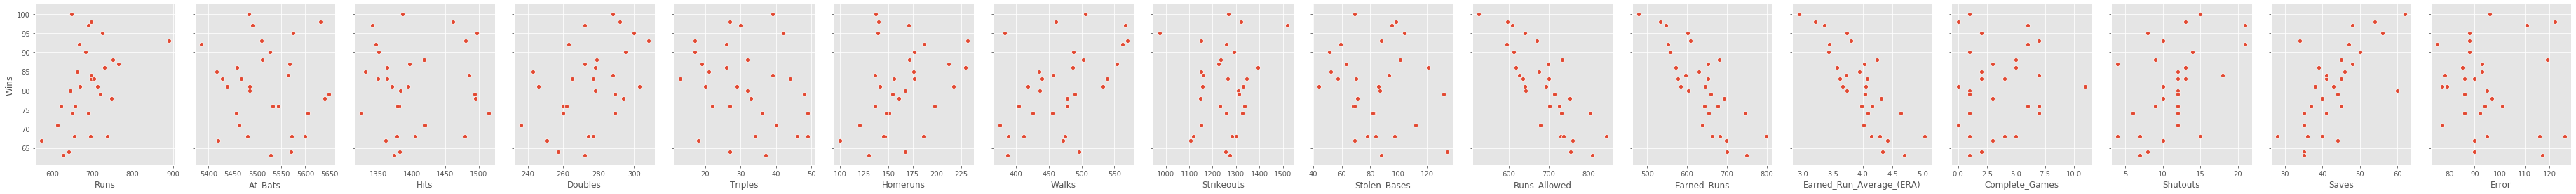

In [16]:
sns.pairplot(teams_df, x_vars=['Runs', 'At_Bats', 'Hits', 'Doubles', 
               'Triples', 'Homeruns', 'Walks', 'Strikeouts', 
               'Stolen_Bases', 'Runs_Allowed', 'Earned_Runs',
               'Earned_Run_Average_(ERA)', 'Complete_Games','Shutouts', 'Saves','Error'], y_vars='Wins', height = 4 , aspect = 0.8);


BARPLOT

A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars.



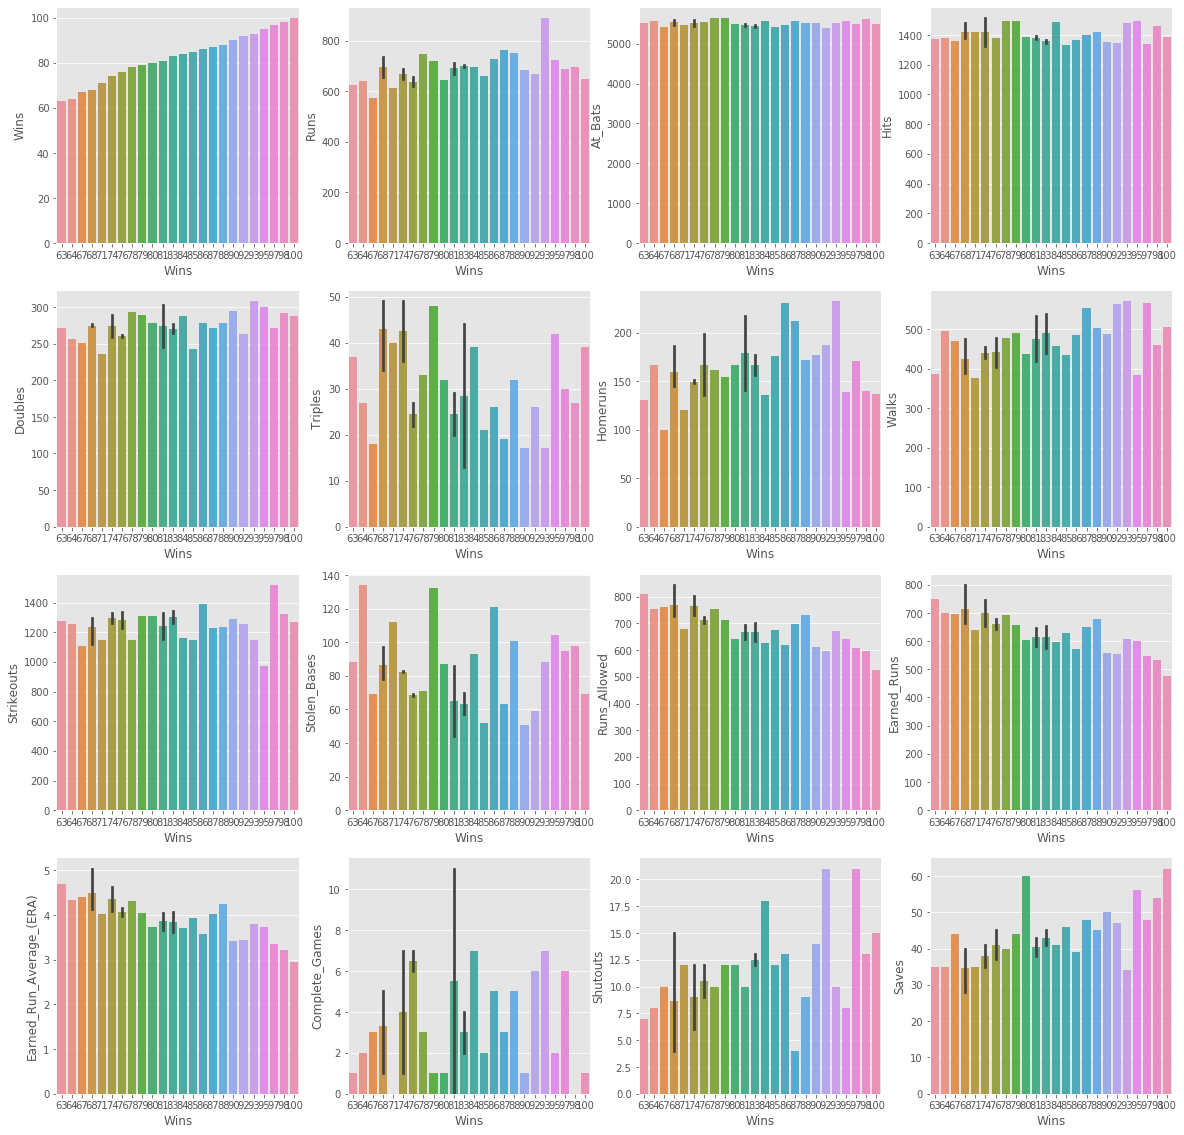

In [18]:
fig, ax1 = plt.subplots(4,4, figsize=(20 , 20))
k = 0
columns = list(teams_df.columns)
for i in range(4):
    for j in range(4):
            sns.barplot(teams_df['Wins'], teams_df[columns[k]], ax = ax1[i][j])
            k += 1
plt.show()


Plotting Boxplot for visualising Outliers



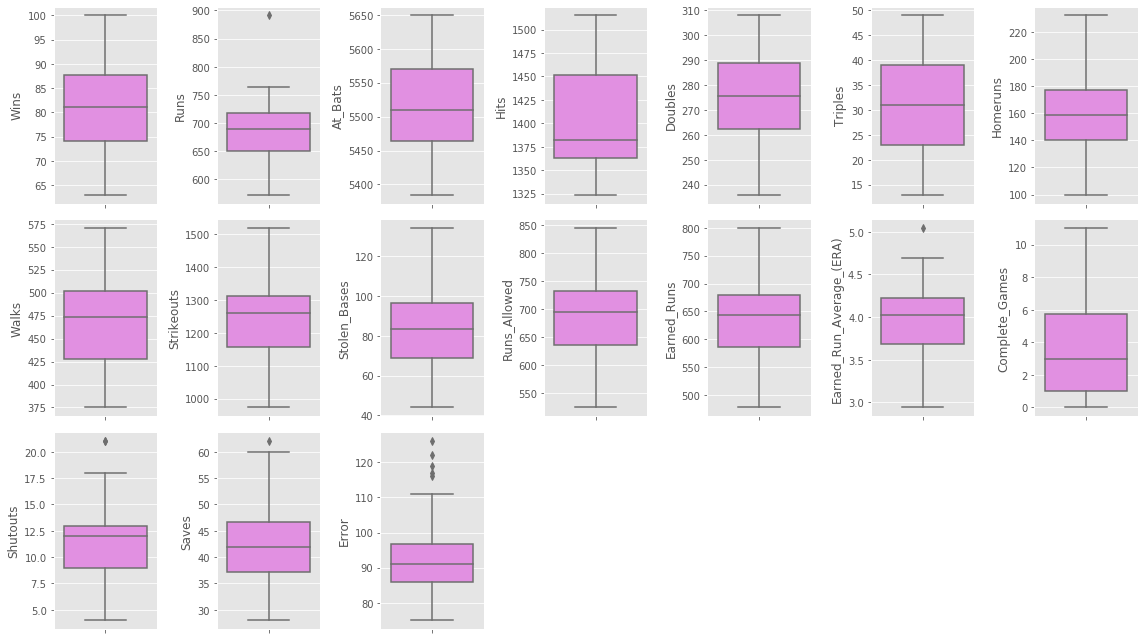

In [19]:
col=teams_df.columns.values
ncol=7
nrows=3
plt.figure(figsize=(16,9))
for i in range (0,len(col)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(teams_df[col[i]],color='violet',orient='v')
    plt.tight_layout()


In [20]:
teams_df.describe()


,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Complete_Games,Shutouts,Saves,Error
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Finding Zscore for our data



In [22]:
from scipy.stats import zscore
z_score = np.abs(zscore(teams_df))


In [23]:
teams_df.shape


(30, 17)

 I have created two categories

teams_df = bdf DataFrame without Outliers

teams_df1 = bdf DataFrame wit Outliers



In [25]:
teams_df = teams_df[(z_score<3).all(axis = 1)]
teams_df.shape


(29, 17)

From above we can observe that the shape of dataframe earlier wa (30,17) but now it is reduced to (29,17). So we successfully removed the outliers.



In [30]:
for i in z_score:
    if z_score.all() > 3:
        print(i)


Checking for correlation

LMPLOT

This function combines regplot() and FacetGrid. It is intended as a convenient interface to fit regression models across conditional subsets of a dataset.



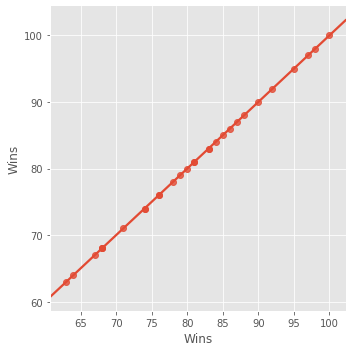

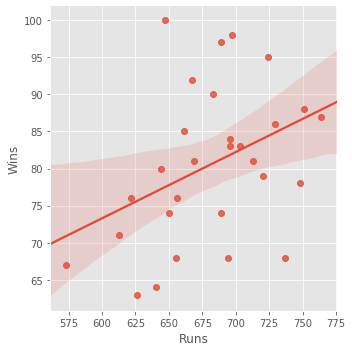

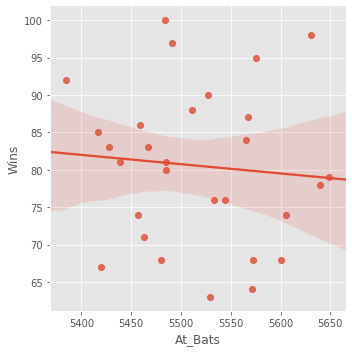

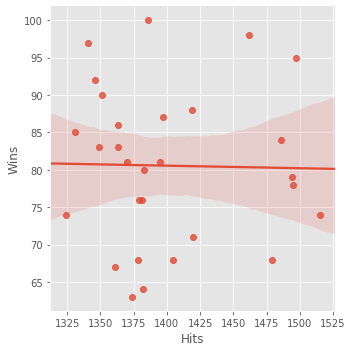

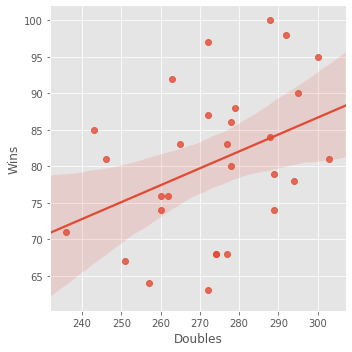

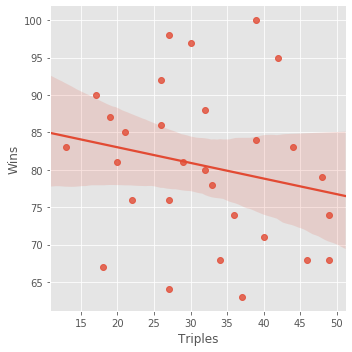

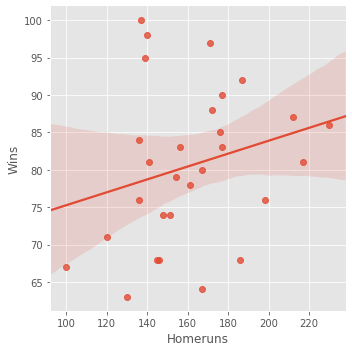

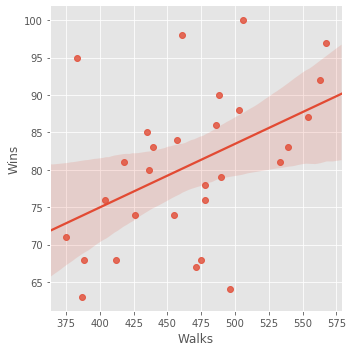

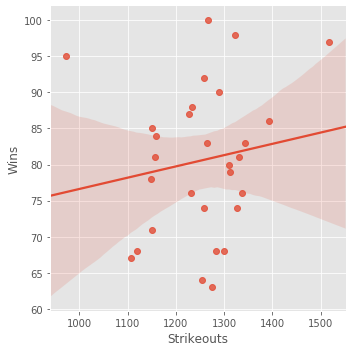

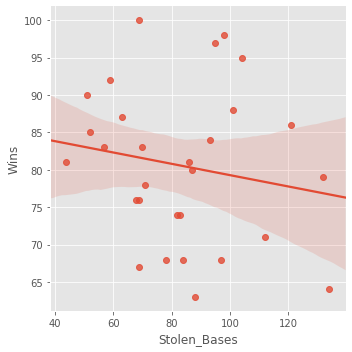

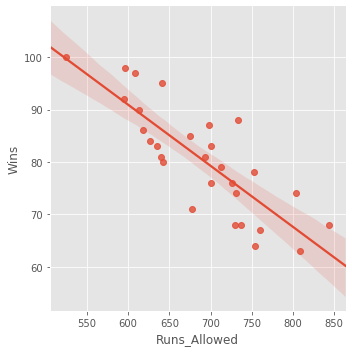

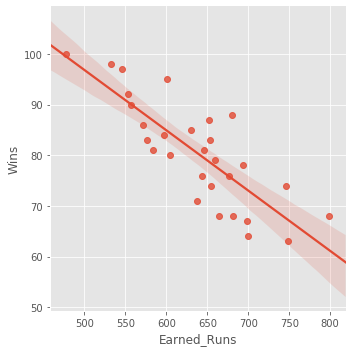

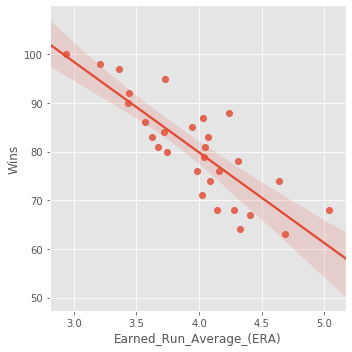

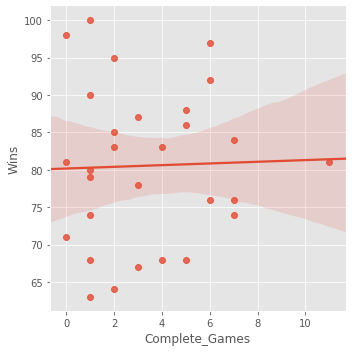

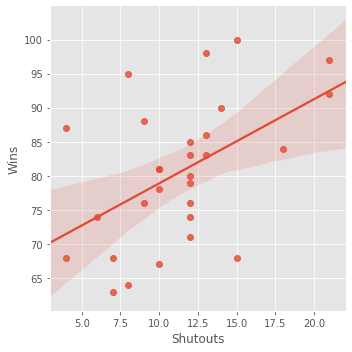

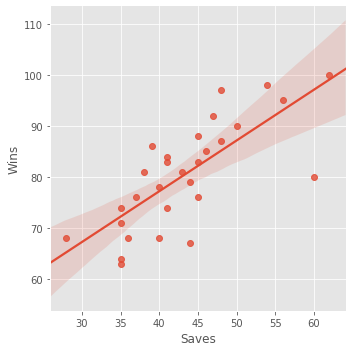

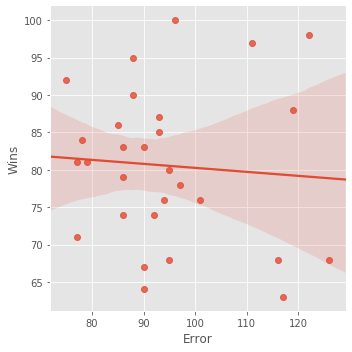

In [31]:
for i in teams_df:
    sns.lmplot(x = i , y ='Wins' , data = teams_df , scatter = True)


In [32]:
corr_df = teams_df.corr()
corr_df  = corr_df.iloc[: , :1]
corr_df


,Wins
Wins,1.000000
Runs,0.390451
At_Bats,-0.085780
Hits,-0.018360
Doubles,0.384886
Triples,-0.206737
Homeruns,0.245697
Walks,0.447513
Strikeouts,0.156469
Stolen_Bases,-0.169503


We can see that


Run is proportional to wins


At_bats is inversely proportional to wins


Hits is unaffected by Wins


Double is proportional to Wins


Triples is inversely proportional to Wins


Homeruns is proportional to Wins

Walks is proportional to wins

Srikeout is proportional to wins

Stolen_bases is proportional to Wins

Runs_allowed is inversely proportional to Wins

Earned_runs is inversely proportional to Wins

earned_run_average is inversely proportional to Wins

Wins is somewhat affected by complete Games

Wins is somewhat affected by shutouts

Wins is affected by Saves

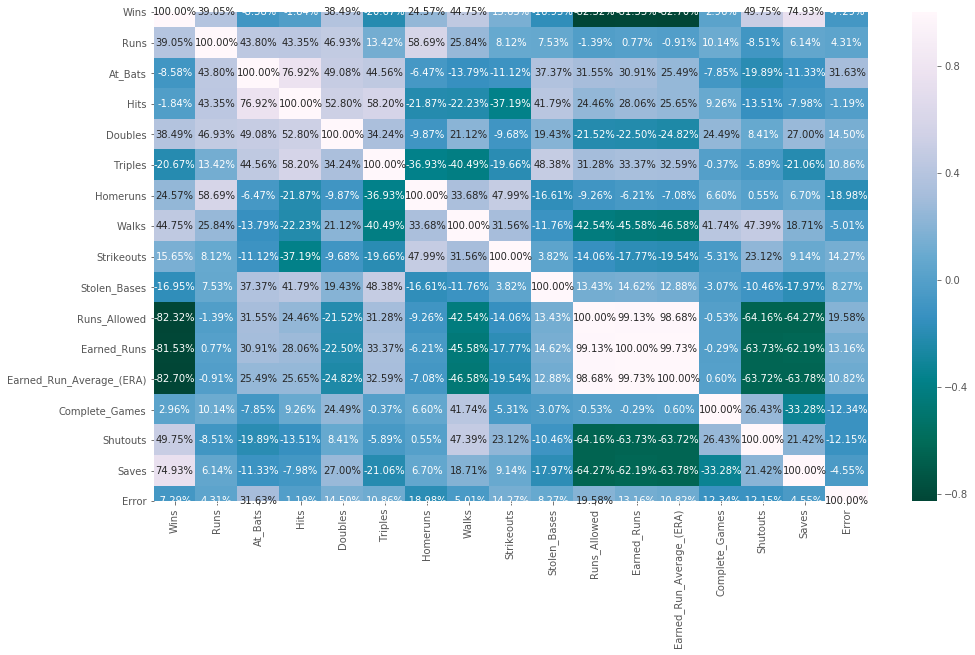

In [33]:
plt.figure(figsize = (16,9))
sns.heatmap(teams_df.corr() , annot = True , fmt = '.2%' , cmap = 'PuBuGn_r')


From bove we can see that Wins are not so much affected by Hits and Complete_Games (correlation is < 5%) , so we can drop Hits and Complete_Games column.

Feature Selection



In [34]:
to_drop = ['Hits' , 'Complete_Games']
teams_df = teams_df.drop(to_drop, axis = 1)


In [35]:
teams_df.shape


(29, 15)

In [36]:
teams_df.head()


,Wins,Runs,At_Bats,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Shutouts,Saves,Error
0,95,724,5575,300,42,139,383,973,104,641,601,3.73,8,56,88
1,83,696,5467,277,44,156,439,1264,70,700,653,4.07,12,45,86
2,81,669,5439,303,29,141,533,1157,86,640,584,3.67,10,38,79
3,76,622,5533,260,27,136,404,1231,68,701,643,3.98,9,37,101
4,74,689,5605,289,49,151,455,1259,83,803,746,4.64,12,35,86


In [37]:
x = teams_df.drop('Wins', axis= 1)
x.head()


,Runs,At_Bats,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Shutouts,Saves,Error
0,724,5575,300,42,139,383,973,104,641,601,3.73,8,56,88
1,696,5467,277,44,156,439,1264,70,700,653,4.07,12,45,86
2,669,5439,303,29,141,533,1157,86,640,584,3.67,10,38,79
3,622,5533,260,27,136,404,1231,68,701,643,3.98,9,37,101
4,689,5605,289,49,151,455,1259,83,803,746,4.64,12,35,86


Skewness

Checking for skewness and dealing with it.



In [39]:
x.skew()


Runs                       -0.215364
At_Bats                     0.169573
Doubles                    -0.335304
Triples                     0.090124
Homeruns                    0.450862
Walks                       0.151193
Strikeouts                 -0.233815
Stolen_Bases                0.494966
Runs_Allowed                0.018155
Earned_Runs                 0.018461
Earned_Run_Average_(ERA)    0.016693
Shutouts                    0.526943
Saves                       0.627480
Error                       0.840271
dtype: float64

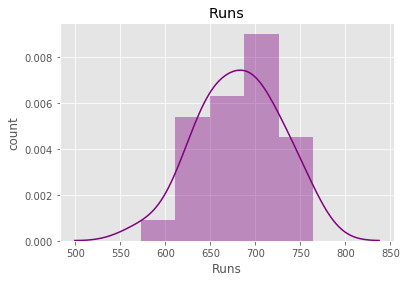

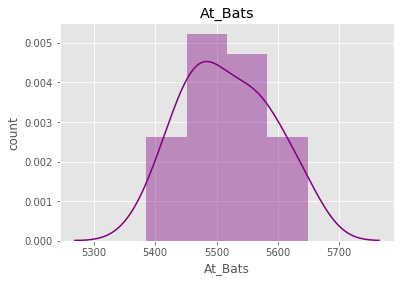

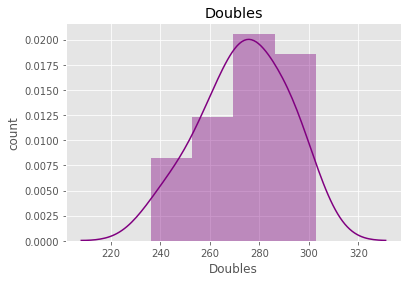

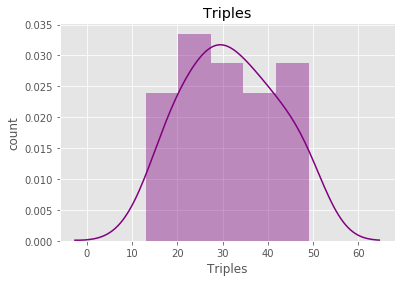

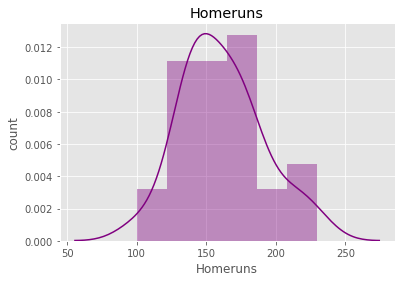

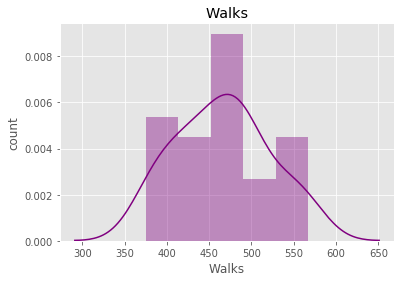

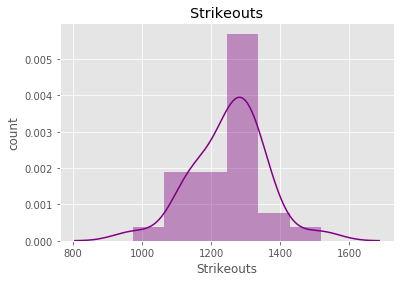

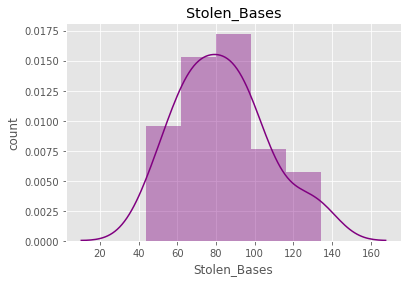

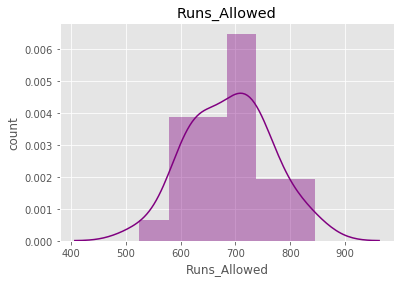

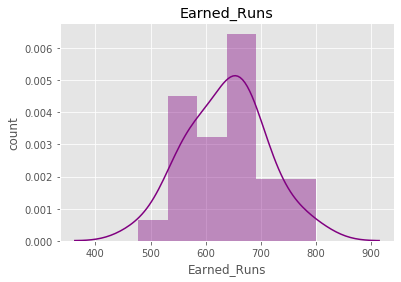

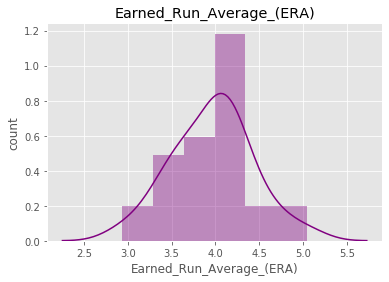

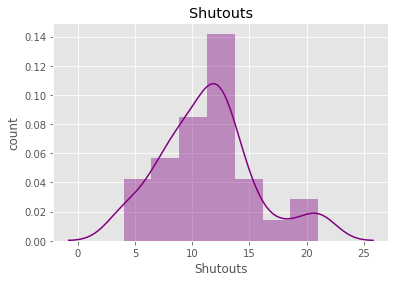

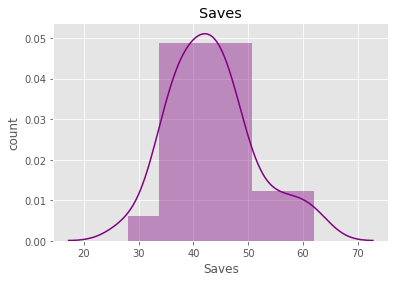

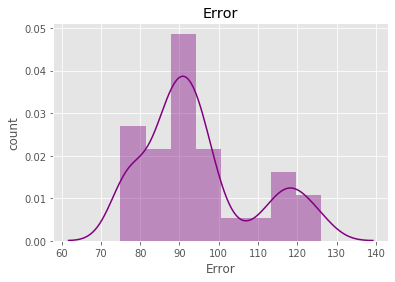

In [40]:
for feature in x :
    sns.distplot(x[feature] , kde = True , color = 'purple' )
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()


The rule of thumb seems to be: If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed

From above we can see that Saves & Errors are skewed so we need to deal with them.



In [41]:
x.columns


Index(['Runs', 'At_Bats', 'Doubles', 'Triples', 'Homeruns', 'Walks',
       'Strikeouts', 'Stolen_Bases', 'Runs_Allowed', 'Earned_Runs',
       'Earned_Run_Average_(ERA)', 'Shutouts', 'Saves', 'Error'],
      dtype='object')

Scaling the data



In [43]:
for i in x :
    print(i , max(x[i]) - min(x[i]))


Runs 191
At_Bats 264
Doubles 67
Triples 36
Homeruns 130
Walks 192
Strikeouts 545
Stolen_Bases 90
Runs_Allowed 319
Earned_Runs 321
Earned_Run_Average_(ERA) 2.1
Shutouts 17
Saves 34
Error 51


So here we can see that there is so much difference between max and min values in this dataset . So we need to scale them.

MinMax Scaler

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.



In [44]:
scaler = MinMaxScaler()
x_s = scaler.fit_transform(x)
x_sc = pd.DataFrame(x_s , columns = x.columns)


In [45]:
#Our dataframe is being scaled .
x_sc


,Runs,At_Bats,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Shutouts,Saves,Error
0,0.790576,0.719697,0.955224,0.805556,0.300000,0.041667,0.000000,0.666667,0.363636,0.383178,0.376190,0.235294,0.823529,0.254902
1,0.643979,0.310606,0.611940,0.861111,0.430769,0.333333,0.533945,0.288889,0.548589,0.545171,0.538095,0.470588,0.500000,0.215686
2,0.502618,0.204545,1.000000,0.444444,0.315385,0.822917,0.337615,0.466667,0.360502,0.330218,0.347619,0.352941,0.294118,0.078431
3,0.256545,0.560606,0.358209,0.388889,0.276923,0.151042,0.473394,0.266667,0.551724,0.514019,0.495238,0.294118,0.264706,0.509804
4,0.607330,0.833333,0.791045,1.000000,0.392308,0.416667,0.524771,0.433333,0.871473,0.834891,0.809524,0.470588,0.205882,0.215686
5,1.000000,0.689394,0.537313,0.166667,0.861538,0.932292,0.466055,0.211111,0.542320,0.542056,0.519048,0.000000,0.588235,0.352941
6,0.732984,0.378788,0.149254,0.194444,0.900000,0.223958,0.656881,0.000000,0.526646,0.523364,0.528571,0.352941,0.441176,0.039216
7,0.371728,0.378788,0.626866,0.527778,0.515385,0.317708,0.618349,0.477778,0.366771,0.392523,0.380952,0.470588,0.941176,0.392157
8,0.916230,0.965909,0.865672,0.555556,0.469231,0.536458,0.321101,0.300000,0.714734,0.672897,0.652381,0.352941,0.352941,0.431373
9,0.931937,0.477273,0.641791,0.527778,0.553846,0.666667,0.477064,0.633333,0.652038,0.629283,0.619048,0.294118,0.500000,0.862745


PLotting heatmap to check for further correlatios



From above we can see that columns like

Runs_Allowed and Earned_runs

Runs_Allowed and Earned_Run_Average

Earned_Runs and Earned_Run_Average

are highly correlated so we can apply PCA on this .

PCA

In [46]:
pca = PCA(n_components = 12)
xpca = pca.fit_transform(x_sc)


In [47]:
x_f = pd.DataFrame(xpca)


In [48]:
x_f

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.222468,-0.540037,-0.432983,-0.284244,0.619740,0.140736,0.150343,-0.001328,0.198415,-0.120217,-0.115391,0.012251
1,0.092722,0.019415,-0.139993,-0.230082,0.089953,-0.065600,-0.292827,0.233882,-0.044093,-0.018383,0.028189,-0.053477
2,-0.345805,-0.092149,-0.122303,-0.255253,0.004191,-0.354250,0.381572,0.310866,0.117409,0.259336,0.045504,0.050225
3,0.224761,0.364218,-0.222232,0.259231,0.099342,-0.000555,0.000870,-0.224814,0.029003,0.166249,0.113493,0.027545
4,0.691134,-0.240490,0.055819,-0.271682,-0.114119,-0.341010,-0.180871,0.006391,-0.254859,0.060274,-0.008766,0.010682
5,-0.182641,-0.049644,0.831316,0.004004,0.320144,-0.036153,0.256258,0.006436,0.018393,-0.200085,0.199335,0.038925
6,-0.179387,0.597607,0.438184,-0.244209,0.281048,0.184099,-0.311859,-0.215938,0.002929,0.044841,0.046565,-0.044583
7,-0.260490,-0.031909,-0.259824,0.057551,0.190187,0.318752,-0.040497,0.110806,-0.241681,-0.068355,-0.137101,0.075725
8,0.367036,-0.388871,0.348040,-0.009930,0.240387,-0.342518,0.027874,-0.154828,0.003006,-0.007351,-0.034780,-0.061034
9,0.206782,-0.274348,0.359690,0.308056,-0.068667,0.070101,0.088092,0.259516,0.200439,-0.208775,-0.113460,-0.083625


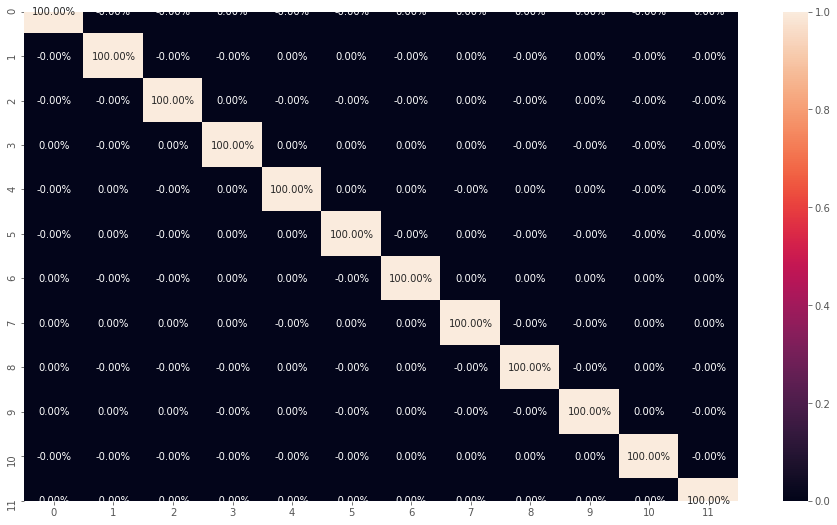

In [49]:
plt.figure(figsize = (16,9))
sns.heatmap(x_f.corr() , annot = True ,  fmt ='.2%')


In [51]:
y = teams_df['Wins']
y


0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: Wins, dtype: int64

# Building Machine Learning Models¶


Finding Best Random State



In [52]:
best_score=0
for i in range(41):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(x_f, y, test_size = 0.2, random_state = i)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    y_predicted = lr.predict(X_test)
    b_score= r2_score(y_test ,y_predicted )
    if b_score>best_score:
        best_score=b_score
        randomState=i
    
print('Best Score = {} For Random state = {}'.format(best_score*100,randomState))


Best Score = 92.11434716769477 For Random state = 15


Applying Machine Learning Models



In [53]:
X_train, X_test, y_train, y_test = train_test_split(x_f , y, train_size=0.7, test_size=0.3, random_state= 15)

model_reg = [LinearRegression,RandomForestRegressor, SVR, DecisionTreeRegressor,KNeighborsRegressor, GradientBoostingRegressor,
             ExtraTreeRegressor , Lasso , Ridge , ElasticNet]


for model in model_reg:
    m = model()
    print('\n''Model: ',m)
    m.fit(X_train, y_train)
    scr=m.score(X_train,y_train)
    score = (m.score(X_test , y_test))
    print('\n''-->''Score:',score)
    scr_cross=cross_val_score(m,x,y,cv=5)
    scr_mean=scr_cross.mean()
    print('Cross validation score: ',scr_mean)
    print('Difference between accuracy and cross validation score: ', scr-scr_mean)
    y_predicted = m.predict(X_test)
    print('Mean Absolute Error: ',mean_absolute_error(y_test, y_predicted))
    print('R2 Score' , r2_score(y_test , y_predicted))



Model:  LinearRegression()

-->Score: 0.8906360512450109
Cross validation score:  0.11723455946702685
Difference between accuracy and cross validation score:  0.7688371863366803
Mean Absolute Error:  3.4587840666700345
R2 Score 0.8906360512450109

Model:  RandomForestRegressor()

-->Score: 0.4363649797570852
Cross validation score:  -0.4321801750412112
Difference between accuracy and cross validation score:  1.3080139362019256
Mean Absolute Error:  7.386666666666666
R2 Score 0.4363649797570852

Model:  SVR()

-->Score: 0.10296195702176081
Cross validation score:  -0.42865190306879625
Difference between accuracy and cross validation score:  0.6709365570007293
Mean Absolute Error:  8.78089815927008
R2 Score 0.10296195702176081

Model:  DecisionTreeRegressor()

-->Score: -0.7556128082443874
Cross validation score:  -2.4468491926324334
Difference between accuracy and cross validation score:  3.4468491926324334
Mean Absolute Error:  12.444444444444445
R2 Score -0.7556128082443874

Model:  

We will use these Algorithms to predict our regression problem.

Linear Regression



In [54]:
X_train, X_test, y_train, y_test = train_test_split(x_f, y, test_size = 0.2, random_state = 15)
    
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)
print('The R2 score={}'.format(r2_score(y_test , lr_pred)*100))
print('The MSE ={}'.format(mean_squared_error(y_test , lr_pred)))
print('The MAE ={}'.format(mean_absolute_error(lr_pred , y_test)))
print('The RMSE ={}'.format(np.sqrt(mean_squared_error(lr_pred , y_test))))


The R2 score=92.11434716769477
The MSE =12.958756154421588
The MAE =3.0028817863997617
The RMSE =3.599827239524362


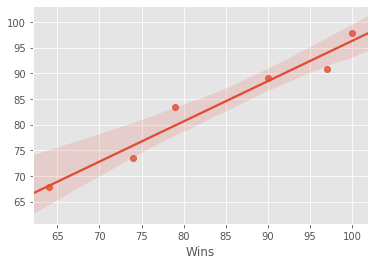

In [55]:
sns.regplot(y_test,lr_pred , scatter = True , label = True)


Random Forest Regressor



In [56]:
best_score=0
for i in range(201):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(x_f, y, test_size = 0.2, random_state = i)
    rf = RandomForestRegressor()
    rf.fit(X_train,y_train)
    y_predicted = rf.predict(X_test)
    b_score= r2_score(y_test ,y_predicted )
    if b_score>best_score:
        best_score=b_score
        randomState=i
    
print('Best Score = {} For Random state = {}'.format(best_score*100,randomState))


Best Score = 94.39053380782916 For Random state = 54


In [57]:
X_train, X_test, y_train, y_test = train_test_split(x_f, y, test_size = 0.2, random_state = 115)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
print('The R2 score={}'.format(r2_score(y_test, rf_pred)*100))
print('The MSE ={}'.format(mean_squared_error(y_test, rf_pred)))
print('The MAE ={}'.format(mean_absolute_error(y_test, rf_pred)))
print('The RMSE ={}'.format(np.sqrt(mean_squared_error(y_test, rf_pred))))


The R2 score=75.34013081395351
The MSE =9.425549999999992
The MAE =2.2483333333333326
The RMSE =3.070105861366997


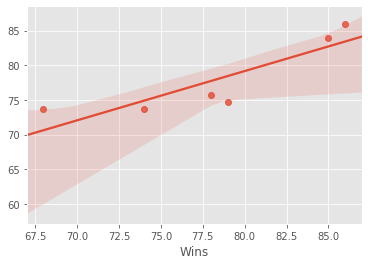

In [58]:
sns.regplot(y_test, rf_pred , scatter = True , label = True)


SVR

In [59]:
best_score=0
for i in range(201):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(x_f, y, test_size = 0.2, random_state = i)
    sv = SVR()
    sv.fit(X_train,y_train)
    y_predicted = sv.predict(X_test)
    b_score= r2_score(y_test ,y_predicted )
    if b_score>best_score:
        best_score=b_score
        randomState=i
        
print('Best Score = {} For Random state = {}'.format(best_score*100,randomState))


Best Score = 37.73255818609361 For Random state = 120


In [60]:
X_train, X_test, y_train, y_test = train_test_split(x_f, y, test_size = 0.2, random_state = 120)

sv = SVR()
sv.fit(X_train , y_train)
sv_pred = sv.predict(X_test)
print('The R2 score={}'.format(r2_score(y_test, sv_pred)*100))
print('The MSE ={}'.format(mean_squared_error(y_test, sv_pred)))
print('The MAE ={}'.format(mean_absolute_error(y_test, sv_pred)))
print('The RMSE ={}'.format(np.sqrt(mean_squared_error(y_test, sv_pred))))


The R2 score=37.73255818609361
The MSE =9.841715108920207
The MAE =2.7248702363554664
The RMSE =3.137150794737194


Ridge Regression



In [61]:
best_score=0
for i in range(201):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(x_f, y, test_size = 0.2, random_state = i)
    rg = Ridge()
    rg.fit(X_train,y_train)
    y_predicted = rg.predict(X_test)
    b_score= r2_score(y_test ,y_predicted )
    if b_score>best_score:
        best_score=b_score
        randomState=i
        
print('Best Score = {} For Random state = {}'.format(best_score*100,randomState))


Best Score = 94.67681864471844 For Random state = 198


In [62]:
X_train, X_test, y_train, y_test = train_test_split(x_f, y, test_size = 0.2, random_state = 198)
rg = Ridge()
rg.fit(X_train , y_train)
rg_pred = rg.predict(X_test)
print('The R2 score={}'.format(r2_score(y_test, rg_pred)*100))
print('The MSE ={}'.format(mean_squared_error(y_test, rg_pred)))
print('The MAE ={}'.format(mean_absolute_error(y_test, rg_pred)))
print('The RMSE ={}'.format(np.sqrt(mean_squared_error(y_test, rg_pred))))


The R2 score=94.67681864471844
The MSE =7.553002878549492
The MAE =2.357488706586331
The RMSE =2.7482727081840865


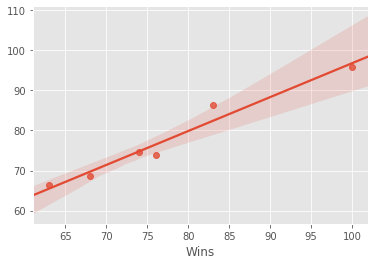

In [63]:
sns.regplot(y_test, rg_pred , scatter = True , label = True)


From above we have observed that Ridge Regression is the best model for our predictions of this model .



In [65]:
import pickle


In [67]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
